In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
regular_season_results_df = pd.read_csv('data/regular_season_results.csv')
regular_season_results_df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN
...,...,...,...,...,...,...,...,...
91219,S,132,592,61,640,60,N,0.0
91220,S,132,671,69,670,55,N,0.0
91221,S,132,779,65,825,61,N,0.0
91222,S,132,811,82,605,81,N,1.0


In [4]:
tourney_seeds_df = pd.read_csv('data/tourney_seeds.csv')
tourney_seeds_df

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729
...,...,...,...
1237,S,Z12,689
1238,S,Z13,702
1239,S,Z14,811
1240,S,Z15,509


In [5]:
tourney_slots_df = pd.read_csv('data/tourney_slots.csv')
tourney_slots_df

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12
...,...,...,...,...
1218,S,R4Y1,R3Y1,R3Y2
1219,S,R4Z1,R3Z1,R3Z2
1220,S,R5WX,R4W1,R4X1
1221,S,R5YZ,R4Y1,R4Z1


In [50]:
merge_df = regular_season_results_df[['season', 'wteam', 'lteam']]
merge_df = merge_df.merge(tourney_seeds_df, left_on=['season', 'wteam'], right_on=['season', 'team'])
merge_df = merge_df.merge(tourney_seeds_df, left_on=['season', 'lteam'], right_on=['season', 'team'])
merge_df = merge_df[['season', 'wteam', 'seed_x', 'lteam', 'seed_y']]
merge_df = merge_df.rename(columns={'seed_x': 'wseed', 'seed_y': 'lseed'})
merge_df['wseed'] = merge_df['wseed'].str[1:]
merge_df['lseed'] = merge_df['lseed'].str[1:]

In [51]:
merge_df['vs'] = merge_df['wseed'] + '-' + merge_df['lseed']
merge_df

,season,wteam,wseed,lteam,lseed,vs
0,A,511,03,515,12,03-12
1,A,640,01,515,12,01-12
2,A,640,01,515,12,01-12
3,A,666,05,515,12,05-12
4,A,675,05,515,12,05-12
...,...,...,...,...,...,...
5194,S,720,06,509,15,06-15
5195,S,686,16b,509,15,16b-15
5196,S,720,06,689,12,06-12
5197,S,811,14,553,16,14-16


In [64]:
higher_seed_won_df: pd.DataFrame = merge_df.loc[
    (merge_df['vs'] == '16-01') | (merge_df['vs'] == '15-02') | (merge_df['vs'] == '14-03') | (
                merge_df['vs'] == '13-04') | (merge_df['vs'] == '12-05') | (merge_df['vs'] == '11-06') | (
                merge_df['vs'] == '10-07') | (merge_df['vs'] == '09-08')
    ][['wseed', 'season']]

higher_seed_won_df

,wseed,season
37,12,A
49,11,A
73,09,A
274,15,B
299,10,B
...,...,...
5006,09,S
5041,09,S
5048,10,S
5125,11,S


In [65]:
higher_seed_lost_df = merge_df.loc[
    (merge_df['vs'] == '01-16') | (merge_df['vs'] == '02-15') | (merge_df['vs'] == '03-14') | (
                merge_df['vs'] == '04-13') | (merge_df['vs'] == '05-12') | (merge_df['vs'] == '06-11') | (
                merge_df['vs'] == '07-10') | (merge_df['vs'] == '08-09')
    ][['lseed', 'season']]

higher_seed_lost_df

,lseed,season
3,12,A
4,12,A
93,09,A
174,09,A
358,11,B
...,...,...
5034,11,S
5084,11,S
5165,15,S
5168,10,S


In [85]:
won_dict = higher_seed_won_df.groupby('wseed').count().to_dict().pop('season')

{'09': 18, '10': 19, '11': 14, '12': 6, '13': 4, '15': 2}

In [74]:
lost_dict = higher_seed_lost_df.groupby('lseed').count().to_dict().pop('season')

In [75]:
sum_dict = {i: 0 for i in lost_dict}

In [78]:
for key in sum_dict:
    if key in won_dict:
        sum_dict[key] += won_dict[key]
    else:
        won_dict[key] = 0

    if key in lost_dict:
        sum_dict[key] += lost_dict[key]

In [79]:
sum_dict

{'09': 88,
 '10': 98,
 '11': 86,
 '12': 56,
 '13': 16,
 '14': 18,
 '15': 20,
 '16': 14}

In [80]:
percentage_dict = {i: won_dict[i] / sum_dict[i] for i in sum_dict}

In [81]:
percentage_dict

{'09': 0.20454545454545456,
 '10': 0.19387755102040816,
 '11': 0.16279069767441862,
 '12': 0.10714285714285714,
 '13': 0.25,
 '14': 0.0,
 '15': 0.1,
 '16': 0.0}

In [93]:
x_axis = list(reversed(percentage_dict.keys()))
x_axis = [f'{int(i)}-{16 - int(i) + 1}' for i in x_axis]
y_axis = list(reversed(percentage_dict.values()))

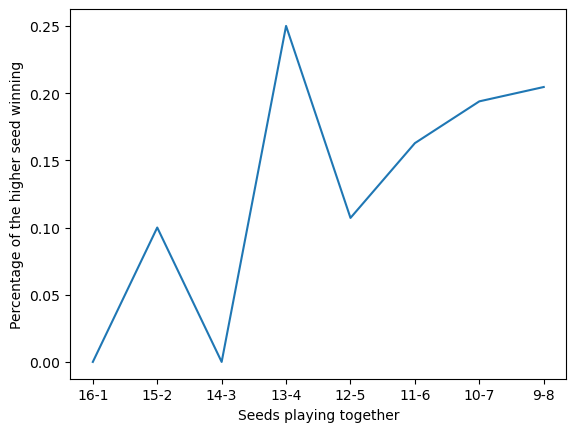

In [94]:
plt.plot(x_axis, y_axis)
plt.xlabel('Seeds playing together')
plt.ylabel('Percentage of the higher seed winning')
plt.show()

In [125]:
data_df: pd.DataFrame = regular_season_results_df.loc[
    (regular_season_results_df['season'] == 'Q') | (regular_season_results_df['season'] == 'R') | (
                regular_season_results_df['season'] == 'S')
    ].reset_index(drop=True)

data_df['count_column'] = 1

In [126]:
data_df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,count_column
0,Q,7,511,73,826,64,H,0.0,1
1,Q,7,675,76,580,66,H,0.0,1
2,Q,7,778,74,847,59,H,0.0,1
3,Q,9,503,68,675,58,A,0.0,1
4,Q,9,511,67,578,59,H,0.0,1
...,...,...,...,...,...,...,...,...,...
15930,S,132,592,61,640,60,N,0.0,1
15931,S,132,671,69,670,55,N,0.0,1
15932,S,132,779,65,825,61,N,0.0,1
15933,S,132,811,82,605,81,N,1.0,1


In [123]:
all_teams_df = pd.concat([data_df['wteam'], data_df['lteam']]).drop_duplicates()
all_teams_df = all_teams_df.to_frame().rename(columns={0: 'team'})
all_teams_df = all_teams_df.sort_values(by=['team'])
all_teams_df = all_teams_df.reset_index(drop=True)
all_teams_df

,team
0,501
1,502
2,503
3,504
4,505
...,...
346,852
347,853
348,854
349,855


In [127]:
all_teams_df = (
    all_teams_df
    .merge(data_df[['count_column', 'wteam']], left_on='team', right_on='wteam')[['count_column', 'team']]
    .groupby('team')
    .sum()
    .rename(columns={'count_column': 'win_count'})
    .reset_index()
)
all_teams_df

,team,win_count
0,501,2
1,502,36
2,503,67
3,504,53
4,505,26
...,...,...
346,852,51
347,853,59
348,854,43
349,855,40


In [157]:
all_teams_df: pd.DataFrame = (
    all_teams_df
    .merge(data_df[['count_column', 'lteam']], left_on='team', right_on='lteam')[['count_column', 'team', 'win_count']]
    .groupby(['team', 'win_count'])
    .sum()
    .rename(columns={'count_column': 'loss_count'})
    .reset_index()
)

all_teams_df

,team,win_count,loss_count
0,501,2,19
1,502,36,47
2,503,67,29
3,504,53,42
4,505,26,57
...,...,...,...
346,852,51,38
347,853,59,38
348,854,43,39
349,855,40,47


In [158]:
opponents_df = pd.concat([
    all_teams_df.merge(data_df, left_on='team', right_on='wteam')[['team', 'lteam']].rename(columns={'lteam': 'opponents'}),
    all_teams_df.merge(data_df, left_on='team', right_on='lteam')[['team', 'wteam']].rename(columns={'wteam': 'opponents'})
]).drop_duplicates().groupby('team').agg(list)
opponents_df

,opponents
team,
501,"[542, 618, 578, 775, 662, 628, 788, 853, 799, ..."
502,"[517, 832, 851, 514, 665, 581, 548, 803, 526, ..."
503,"[675, 574, 514, 593, 855, 693, 661, 669, 529, ..."
504,"[710, 718, 662, 846, 738, 505, 825, 574, 722, ..."
505,"[514, 508, 734, 632, 678, 675, 608, 506, 685, ..."
...,...
852,"[688, 770, 733, 665, 650, 823, 530, 556, 807, ..."
853,"[683, 630, 669, 604, 827, 738, 535, 549, 749, ..."
854,"[544, 517, 611, 828, 750, 532, 741, 616, 531, ..."


In [159]:
all_teams_df = all_teams_df.merge(opponents_df, on='team')
all_teams_df

,team,win_count,loss_count,opponents
0,501,2,19,"[542, 618, 578, 775, 662, 628, 788, 853, 799, ..."
1,502,36,47,"[517, 832, 851, 514, 665, 581, 548, 803, 526, ..."
2,503,67,29,"[675, 574, 514, 593, 855, 693, 661, 669, 529, ..."
3,504,53,42,"[710, 718, 662, 846, 738, 505, 825, 574, 722, ..."
4,505,26,57,"[514, 508, 734, 632, 678, 675, 608, 506, 685, ..."
...,...,...,...,...
346,852,51,38,"[688, 770, 733, 665, 650, 823, 530, 556, 807, ..."
347,853,59,38,"[683, 630, 669, 604, 827, 738, 535, 549, 749, ..."
348,854,43,39,"[544, 517, 611, 828, 750, 532, 741, 616, 531, ..."
349,855,40,47,"[752, 808, 777, 574, 552, 654, 622, 845, 844, ..."


In [169]:
def calculate_strength_of_schedule(row: pd.Series) -> pd.Series:
    opponents_df = pd.DataFrame(row['opponents'], columns=['opponent_team'])

    tmp_df = opponents_df.merge(all_teams_df, left_on='opponent_team', right_on='team')

    total_wins = tmp_df['win_count'].sum()
    total_losses = tmp_df['loss_count'].sum()

    row['strength_of_schedule'] = total_wins / (total_wins + total_losses) * 100

    return row

In [174]:
def calculate_rpi(row: pd.Series) -> pd.Series:
    win_count = row['win_count']
    loss_count = row['loss_count']
    total_games = win_count + loss_count

    strength_of_schedule = row['strength_of_schedule']

    row['rpi'] = 0.5 * win_count / total_games + 0.5 * strength_of_schedule / 100

    return row

In [175]:
all_teams_df = all_teams_df.apply(calculate_strength_of_schedule, axis=1)
all_teams_df = all_teams_df.apply(calculate_rpi, axis=1)
all_teams_df

,team,win_count,loss_count,opponents,strength_of_schedule,rpi
0,501,2,19,"[542, 618, 578, 775, 662, 628, 788, 853, 799, ...",45.801072,0.276624
1,502,36,47,"[517, 832, 851, 514, 665, 581, 548, 803, 526, ...",49.983114,0.466783
2,503,67,29,"[675, 574, 514, 593, 855, 693, 661, 669, 529, ...",52.048726,0.609202
3,504,53,42,"[710, 718, 662, 846, 738, 505, 825, 574, 722, ...",58.235995,0.570127
4,505,26,57,"[514, 508, 734, 632, 678, 675, 608, 506, 685, ...",51.003861,0.411646
...,...,...,...,...,...,...
346,852,51,38,"[688, 770, 733, 665, 650, 823, 530, 556, 807, ...",50.702385,0.540029
347,853,59,38,"[683, 630, 669, 604, 827, 738, 535, 549, 749, ...",55.003044,0.579139
348,854,43,39,"[544, 517, 611, 828, 750, 532, 741, 616, 531, ...",52.890173,0.526646
349,855,40,47,"[752, 808, 777, 574, 552, 654, 622, 845, 844, ...",47.252424,0.466147
